In [2]:
# Revisando el Tidy de las Codornices...
# Importando las librerías...

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Cargar datos
df = pd.read_csv('data/codornices.csv')
df.isnull().sum().any()

False

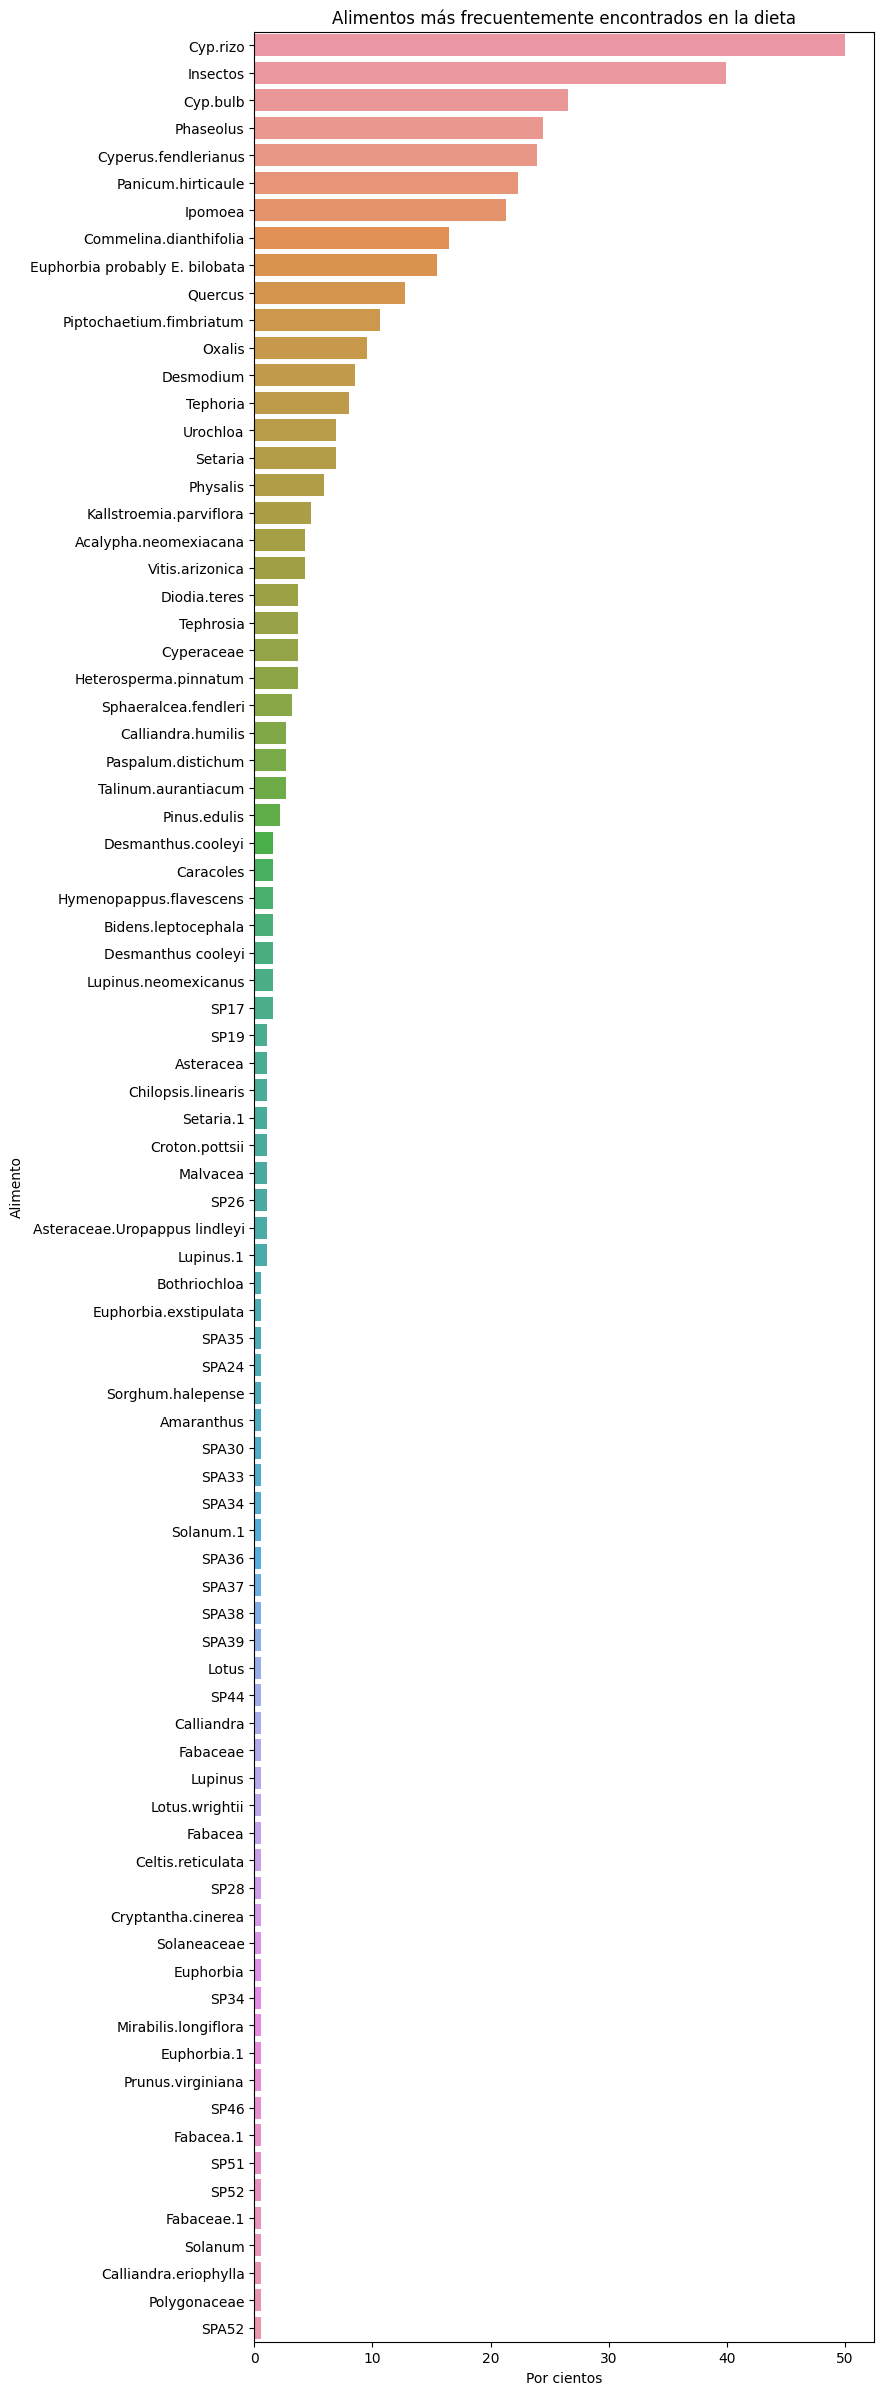

In [5]:
# ¿Cuales son los alimentos más frecuentemente encontrados en la dieta?

# Separando columnas de alimentos de las demás...
non_food_columns = ["id", "edad", "sexo", "estado", "peso total", "time", "covey",
                    "dist camino", "ppanual17", "tmedia17", "altitud", "lat", "lon",
                    "hcrop", "hland", "gap", "year"]

food_columns = [columna for columna in df.columns if columna not in non_food_columns]

# Dicotomizar los valores de las columnas de alimentos a valores cualitativos (True / False)...
df_cualit = df.copy()
df_cualit[food_columns] = df_cualit[food_columns].applymap(lambda x: True if x > 0 else False)

# Eliminar columnas de alimentos que no se consumieron...
food_columns_list = pd.DataFrame(df_cualit[food_columns].sum() != 0).reset_index()
food_columns_list.columns = ["Alimento", "Cantidad"]
food_columns_false = list(food_columns_list.loc[food_columns_list["Cantidad"] == False, "Alimento"])

df_cualit = df_cualit.drop(columns=food_columns_false)

# crear lista de comidas nuevamente... pero a parir del df_cualit...
food_columns = [columna for columna in df_cualit.columns if columna not in non_food_columns]

# foods_df_cualit = pd.DataFrame(df_cualit[food_columns].sum()).reset_index(drop = False)
foods_df_cualit = pd.DataFrame(df_cualit[food_columns].sum() / len(df_cualit) * 100).reset_index(drop=False)

foods_df_cualit.columns = ["Alimento", "Cantidad"]
foods_df_cualit.sort_values(by="Cantidad", ascending=False, inplace=True)
foods_df_cualit

# Graficando las Comidas más frecuentes...
plt.figure(figsize=(8, 30))
sns.barplot(x = "Cantidad", y = "Alimento", data = foods_df_cualit,)
plt.title("Alimentos más frecuentemente encontrados en la dieta")
plt.xlabel("Por cientos")
plt.show()

In [9]:
foods_df_cualit.head()

,Alimento,Cantidad
11,Cyp.rizo,50.000000
6,Insectos,39.893617
2,Cyp.bulb,26.595745
3,Phaseolus,24.468085
27,Cyperus.fendlerianus,23.936170


In [8]:
df_cualit.head()

,id,edad,sexo,estado,peso total,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,...,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland,gap,year
0,2014-104,J,Female,NM,9.7584,True,False,False,False,False,...,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600,Rocky Mountain Ponderosa Pine Woodland,2014
1,2014-105,J,Male,NM,3.9632,True,False,False,False,False,...,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600,Rocky Mountain Ponderosa Pine Woodland,2014
2,2016-133,A,Female,AZ,5.4562,True,False,False,True,True,...,574.06,515.0,15.954167,1527.0,31.375725,-110.530491,0.785803,1.245916,Madrean Encinal,2016
3,2014-28,J,Female,NM,4.4976,True,False,False,False,False,...,23.07,385.0,10.979167,1952.0,33.176791,-107.735593,0.464732,0.764466,Colorado Plateau Pinyon-Juniper Woodland,2014
4,2016-132,J,Male,AZ,5.4630,True,False,True,True,False,...,236.76,521.0,16.133333,1507.0,31.353053,-110.531060,1.680150,1.541562,Apacherian-Chihuahuan Mesquite Upland Scrub,2016


Promedio total de alimentos por individuo: 4.0


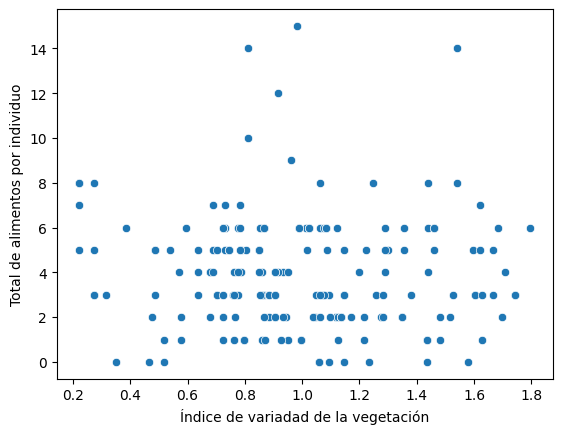

In [12]:
# ¿Cuál es el número pronmedio de alimentos encontrados en un buche?
promedio_total = np.mean(df_cualit[food_columns].sum(axis=1)).round()
print(f"Promedio total de alimentos por individuo: {promedio_total}")

# ¿Existe relación con el índice de variedad de la vegetación? Suena lógico... pero hay que verlo...
df_cualit["total_alimentos"] = df_cualit[food_columns].sum(axis=1)

sns.scatterplot(x = "hland", y = "total_alimentos", data = df_cualit)
plt.xlabel("Índice de variadad de la vegetación")
plt.ylabel("Total de alimentos por individuo")
plt.show()

# Pareciera que no???

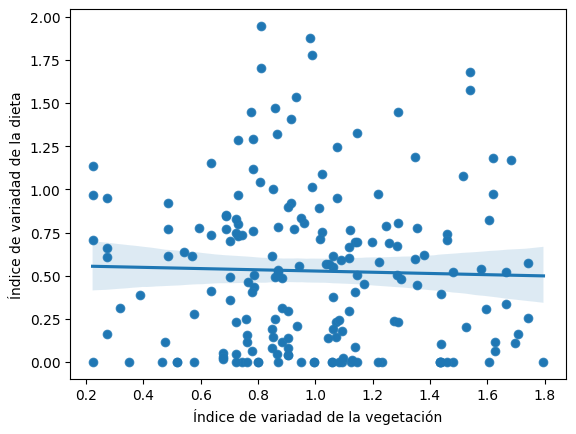

In [13]:
# Gráfico de dispersión del índice de variedad de la vegetación y el índice de variedad de la dieta...
sns.scatterplot(x = "hland", y = "hcrop", data = df_cualit)
sns.regplot(x="hland", y="hcrop", data=df_cualit)
plt.xlabel("Índice de variadad de la vegetación")
plt.ylabel("Índice de variadad de la dieta")
plt.show()

# Definitivamente no parece haber relación lineal...

In [11]:
df_cualit.head()

,id,edad,sexo,estado,peso total,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,...,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland,gap,year
0,2014-104,J,Female,NM,9.7584,True,False,False,False,False,...,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600,Rocky Mountain Ponderosa Pine Woodland,2014
1,2014-105,J,Male,NM,3.9632,True,False,False,False,False,...,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600,Rocky Mountain Ponderosa Pine Woodland,2014
2,2016-133,A,Female,AZ,5.4562,True,False,False,True,True,...,574.06,515.0,15.954167,1527.0,31.375725,-110.530491,0.785803,1.245916,Madrean Encinal,2016
3,2014-28,J,Female,NM,4.4976,True,False,False,False,False,...,23.07,385.0,10.979167,1952.0,33.176791,-107.735593,0.464732,0.764466,Colorado Plateau Pinyon-Juniper Woodland,2014
4,2016-132,J,Male,AZ,5.4630,True,False,True,True,False,...,236.76,521.0,16.133333,1507.0,31.353053,-110.531060,1.680150,1.541562,Apacherian-Chihuahuan Mesquite Upland Scrub,2016


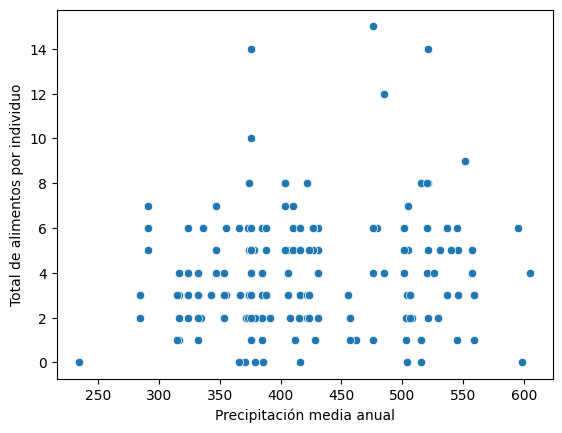

In [14]:
# Relacion entre la cantidad de alimentos diferentes encontrados en el buche y la precipitacion
# media anual
sns.scatterplot(x = "ppanual17", y = "total_alimentos", data = df_cualit)
plt.xlabel("Precipitación media anual")
plt.ylabel("Total de alimentos por individuo")
plt.show()

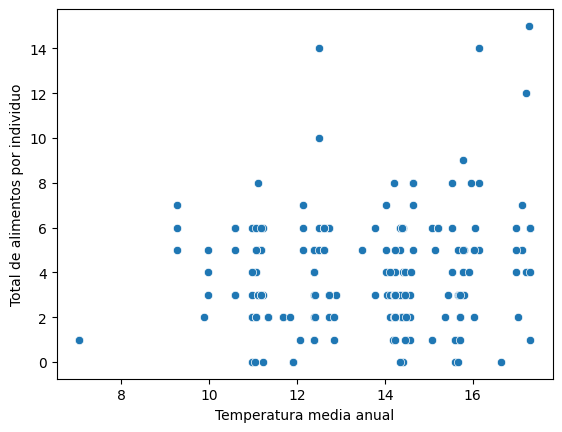

In [15]:
# Relacion entre la cantidad de alimentos diferentes encontrados en el buche y la temperatura
# media anual
sns.scatterplot(x = "tmedia17", y = "total_alimentos", data = df_cualit)
plt.xlabel("Temperatura media anual")
plt.ylabel("Total de alimentos por individuo")
plt.show()